In [1]:
from ddrnet_23_slim import DualResNet as DualResNet_tens, DualResNet_imagenet
from DDRNet_23_slim_official import DualResNet_imagenet_off
from pretrained_model_mapping import set_weight
from comparison_test import test
import torch
import numpy as np
import keras
import tensorflow as tf
from comparison_test import test
from torch import load

In [2]:
# original pytorch model
net = DualResNet_imagenet_off(pretrained=True)
weight_net = net.state_dict()
torch_model = net.eval()

In [3]:
# tensorflow model
model, pret = DualResNet_tens((224, 224, 3), 3, 19, comparison_test=True, softmax_act=False)
set_weight(model, path='DDRNet23s_imagenet.pth', 
           test=True, random_weight=weight_net)

In [4]:
torch_model = torch_model.eval()
  
torch_inputs = torch.Tensor(np.random.rand(1, 3, 224, 224))

tf_inputs = np.transpose(torch_inputs.numpy(), (0, 2, 3, 1))
with torch.no_grad():
    torch_output = torch_model(torch_inputs)

tf_output = model.predict(tf_inputs)

for i in range(16):
    test(torch_output, tf_output, i)

Max difference in conv1 is :8.344650268554688e-07 and avg is: 4.6518124463545973e-08
Max difference in layer1 is :2.1457672119140625e-06 and avg is: 2.2269421151577262e-07
Max difference in layer2 is :2.7418136596679688e-06 and avg is: 2.7137718916492304e-07
Max difference in layer3 is :2.0563602447509766e-06 and avg is: 2.166354704513651e-07
Max difference in layer3_ is :3.2782554626464844e-06 and avg is: 4.424488224685774e-07
Max difference in down3 is :2.16066837310791e-06 and avg is: 1.4283624238942139e-07
Max difference in copression3 is :3.6507844924926758e-06 and avg is: 3.8360852272489865e-07
Max difference in layer4 is :1.9073486328125e-06 and avg is: 2.6604610070535273e-07
Max difference in layer4_ is :4.589557647705078e-06 and avg is: 5.302659928929643e-07
Max difference in down4 is :1.862645149230957e-06 and avg is: 1.4737291564870247e-07
Max difference in compression4 is :4.604458808898926e-06 and avg is: 4.7209056219799095e-07
Max difference in layer5_ is :4.2915344238281

In [72]:
res = []
res_all = []

for num in [224, 400, 800, 1000]:
    
    model, pred = DualResNet_tens((num, num, 3), 3, 19, comparison_test=True, softmax_act=False)
    set_weight(model, path='DDRNet23s_imagenet.pth', 
           test=True, random_weight=weight_net)
    
    torch_inputs = torch.Tensor(np.random.rand(3, 3, num, num))

    tf_inputs = np.transpose(torch_inputs.numpy(), (0, 2, 3, 1))
    with torch.no_grad():
        torch_output = torch_model(torch_inputs)

    tf_output = model.predict(tf_inputs)
    
    for i in range(16):
            res.append(test(torch_output, tf_output, i))
            
    res_all.append(res)
    res = []

Max difference in conv1 is :9.5367431640625e-07 and avg is: 4.671979780823676e-08
Max difference in layer1 is :2.205371856689453e-06 and avg is: 2.2112502051641059e-07
Max difference in layer2 is :2.6226043701171875e-06 and avg is: 2.696719718642271e-07
Max difference in layer3 is :2.2649765014648438e-06 and avg is: 2.0192646843497641e-07
Max difference in layer3_ is :4.291534423828125e-06 and avg is: 4.39812282593266e-07
Max difference in down3 is :2.86102294921875e-06 and avg is: 1.3849991375991522e-07
Max difference in copression3 is :5.0067901611328125e-06 and avg is: 3.8187164363989723e-07
Max difference in layer4 is :2.5033950805664062e-06 and avg is: 2.959999108043121e-07
Max difference in layer4_ is :7.152557373046875e-06 and avg is: 5.344518285710365e-07
Max difference in down4 is :2.2649765014648438e-06 and avg is: 1.5653675689009106e-07
Max difference in compression4 is :7.152557373046875e-06 and avg is: 4.794978281097428e-07
Max difference in layer5_ is :3.6954879760742188e

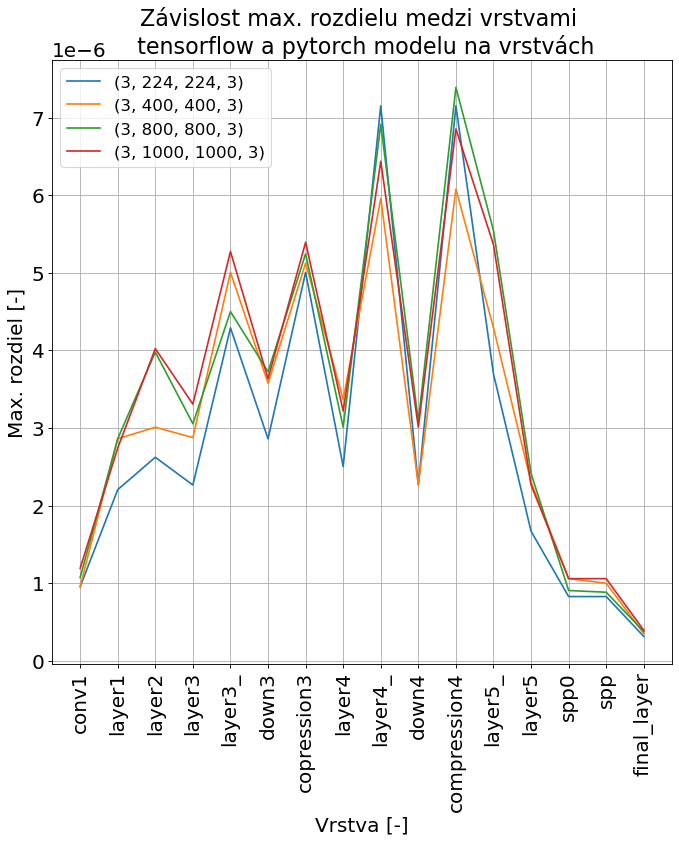

In [74]:
import matplotlib.pyplot as plt

layers = list(torch_output.keys())
x = np.linspace(1, 16, 16)

fig = plt.figure(figsize=(10, 10), dpi=80)
ax = plt.subplot()

plt.plot(x, res_all[0])
plt.plot(x, res_all[1])
plt.plot(x, res_all[2])
plt.plot(x, res_all[3])

plt.ylabel('Max. rozdiel [-]', fontsize=18)
plt.xlabel('Vrstva [-]', fontsize=18)
plt.title('Závislost max. rozdielu medzi vrstvami \n tensorflow a pytorch modelu na vrstvách'
          , fontsize=20)

# plt.xticks(fontsize=18, rotation=45)
plt.xticks(x, layers, rotation=90, fontsize=18)
plt.yticks(rotation=0, fontsize=18)

ax.yaxis.offsetText.set_fontsize(18)

plt.grid()
plt.legend([(3, 224, 224, 3),(3, 400, 400, 3), (3, 800, 800, 3), 
            (3, 1000, 1000, 3)], fontsize=15)
plt.show()